In [1]:
import pandas as pd
import scanpy as sc
from pathlib import Path 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path_to_results = Path("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_gene/")

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [2]:
identity_deg_result_dfs = []

for comb in ["split0", "split1", "split2", "split3"]:
    # Read identities for different splits 
    identity_res_deg= pd.read_csv(path_to_results / comb / f"identity_ood_metrics_deg_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T

    identity_res_deg["OOD combination"] = comb

    identity_res_deg["Model"] = "Identity" 
    
    identity_deg_result_dfs.append(identity_res_deg)

In [3]:
identity_deg_result_dfs = pd.concat(identity_deg_result_dfs)

In [4]:
gene_list = identity_deg_result_dfs.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [5]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

In [6]:
encoded_result_dfs = []

for comb in ["split0", "split1", "split2", "split3"]:
    cellflow_res = pd.read_csv(path_to_results / comb / f"cellflow_ood_metrics_encoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    identity_res= pd.read_csv(path_to_results / comb / f"identity_ood_metrics_encoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    mean_res = pd.read_csv(path_to_results / comb / f"mean_train_metrics_encoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T

    cellflow_res["OOD combination"] = comb
    mean_res["OOD combination"] = comb
    identity_res["OOD combination"] = comb

    cellflow_res["Model"] = "CellFlow" 
    mean_res["Model"] = "Mean" 
    identity_res["Model"] = "Identity" 

    encoded_result_dfs.append(cellflow_res)
    encoded_result_dfs.append(mean_res)
    encoded_result_dfs.append(identity_res)

In [7]:
encoded_result_dfs = pd.concat(encoded_result_dfs, axis=0)

perturbation_cat = []
for pert in encoded_result_dfs.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])

encoded_result_dfs["quantile"] = perturbation_cat

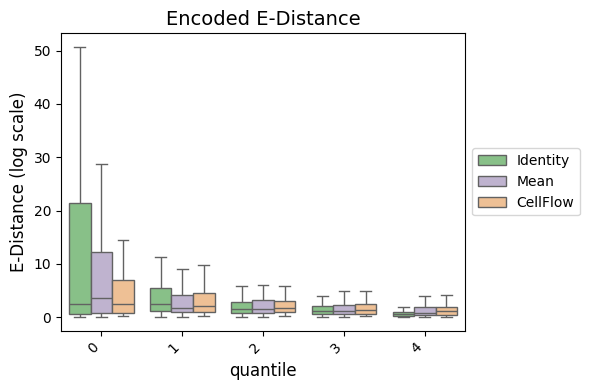

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `encoded_result_dfs` is your DataFrame

# Create the barplot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.boxplot(data=encoded_result_dfs, 
            hue="Model", 
            x="quantile", 
            y="e_distance", showfliers=False, 
            hue_order=["Identity", "Mean", "CellFlow"], palette="Accent"
           )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the y-axis to a logarithmic scale
# plt.yscale('log')

# Add axis labels and title
plt.xlabel("quantile", fontsize=12)
plt.ylabel("E-Distance (log scale)", fontsize=12)
plt.title("Encoded E-Distance", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
deg_result_dfs = []

for comb in ["split0", "split1", "split2", "split3"]:
    cellflow_res_deg = pd.read_csv(path_to_results / comb / f"cellflow_ood_metrics_deg_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    identity_res_deg= pd.read_csv(path_to_results / comb / f"identity_ood_metrics_deg_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    mean_res_deg = pd.read_csv(path_to_results / comb / f"mean_train_metrics_deg_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T

    cellflow_res_deg["OOD combination"] = comb
    mean_res_deg["OOD combination"] = comb
    identity_res_deg["OOD combination"] = comb

    cellflow_res_deg["Model"] = "CellFlow" 
    mean_res_deg["Model"] = "Mean" 
    identity_res_deg["Model"] = "Identity" 

    deg_result_dfs.append(cellflow_res_deg)
    deg_result_dfs.append(mean_res_deg)
    deg_result_dfs.append(identity_res_deg)

In [10]:
deg_result_dfs = pd.concat(deg_result_dfs, axis=0)

perturbation_cat = []
for pert in deg_result_dfs.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])

deg_result_dfs["quantile"] = perturbation_cat

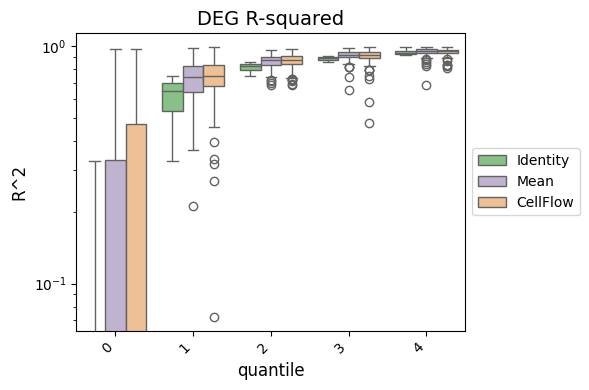

In [11]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.boxplot(data=deg_result_dfs, 
            hue="Model", 
            x="quantile", 
            y="r_squared", #showfliers=False, 
           hue_order=["Identity", "Mean", "CellFlow"], palette="Accent")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add axis labels and title
plt.xlabel("quantile", fontsize=12)
plt.ylabel("R^2", fontsize=12)
plt.title("DEG R-squared", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
decoded_result_dfs = []

for comb in ["split0", "split1", "split2", "split3"]:
    cellflow_res_decoded = pd.read_csv(path_to_results / comb / f"cellflow_ood_metrics_decoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    identity_res_decoded = pd.read_csv(path_to_results / comb / f"identity_ood_metrics_decoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T
    mean_res_decoded = pd.read_csv(path_to_results / comb / f"mean_train_metrics_decoded_{comb[:5]+'_'+comb[5]}.csv", index_col=0).T

    cellflow_res_decoded["OOD combination"] = comb 
    mean_res_decoded["OOD combination"] = comb
    identity_res_decoded["OOD combination"] = comb

    cellflow_res_decoded["Model"] = "CellFlow" 
    mean_res_decoded["Model"] = "Mean" 
    identity_res_decoded["Model"] = "Identity" 

    decoded_result_dfs.append(cellflow_res_decoded)
    decoded_result_dfs.append(mean_res_decoded)
    decoded_result_dfs.append(identity_res_decoded)


In [13]:
decoded_result_dfs = pd.concat(decoded_result_dfs, axis=0)

perturbation_cat = []
for pert in decoded_result_dfs.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])

decoded_result_dfs["quantile"] = perturbation_cat

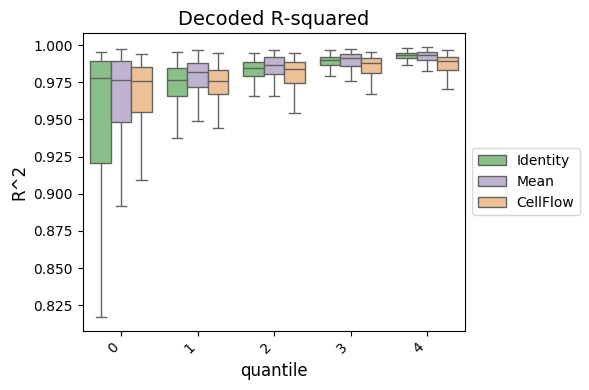

In [14]:
# Create the barplot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.boxplot(data=decoded_result_dfs, 
            hue="Model", 
            x="quantile", 
            y="r_squared", showfliers=False, 
           hue_order=["Identity", "Mean", "CellFlow"], palette="Accent")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the y-axis to a logarithmic scale
# plt.yscale('log')

# Add axis labels and title
plt.xlabel("quantile", fontsize=12)
plt.ylabel("R^2", fontsize=12)
plt.title("Decoded R-squared", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to fit elements properly
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
encoded_result_dfs["sinkhorn_div"] = encoded_result_dfs["sinkhorn_div_1"] + encoded_result_dfs["sinkhorn_div_10"] + encoded_result_dfs["sinkhorn_div_100"] 

In [16]:
decoded_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_held_out/metrics_decoded.csv")
encoded_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_held_out/metrics_encoded.csv")
deg_result_dfs.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/gene_held_out/metrics_deg.csv")